In [1]:
import numpy as np
import collections
import matplotlib.pyplot as  plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [2]:
data=np.load('data.npy')
target=np.load('target.npy')

In [3]:
print(collections.Counter(target))

Counter({1: 113, 2: 91, 0: 81})


In [10]:
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1,random_state=42)

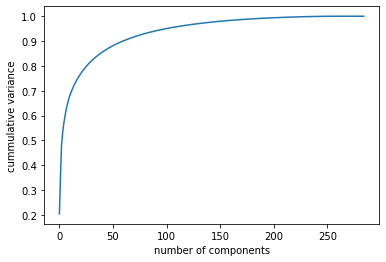

In [5]:
#deciding value of n_component in PCA
pca=PCA()
pca.fit(data)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cummulative variance')
plt.show()


In [11]:
#pca reduces the features, so pipeline ----->    img->pca->svm
pca=PCA(n_components=150,whiten=True,random_state=42)         
svc=SVC(kernel='rbf')

model=make_pipeline(pca,svc)

In [12]:
model.fit(train_data,train_target)

Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC())])

In [13]:
predicted_target=model.predict(test_data)

In [14]:
acc=accuracy_score(test_target,predicted_target)
print('Accuracy: ',acc)

Accuracy:  0.896551724137931


In [15]:
report=classification_report(test_target,predicted_target,target_names=['Barack Obama','Donald Trump','George W Bush'])
print(report)

               precision    recall  f1-score   support

 Barack Obama       1.00      0.70      0.82        10
 Donald Trump       0.89      1.00      0.94         8
George W Bush       0.85      1.00      0.92        11

     accuracy                           0.90        29
    macro avg       0.91      0.90      0.89        29
 weighted avg       0.91      0.90      0.89        29



In [16]:
matrix=confusion_matrix(test_target,predicted_target)
print(matrix)

[[ 7  1  2]
 [ 0  8  0]
 [ 0  0 11]]


In [17]:
import joblib

joblib.dump(model,'SVM-Face Recognition.sav')

['SVM-Face Recognition.sav']